# 2주차 실습 파일

In [28]:
#해당하는 모듈들을 모두 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [29]:
#데이타 프레임을 형성을 함
pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [30]:
# Use only one feature
diabetes_X = diabetes.data[:,np.newaxis,2] #설명변후한개만 들어감
diabetes_y = diabetes.target #가능한지

In [31]:
diabetes.data[:,].shape   #제일 처음 데이터의 모형을 설정
diabetes_X.shape  #해당 값이 잘 들어 갔는지 체크를 시행

(442, 1)

In [7]:
# 직접 나눠졌는데 굳이 직접 나눠야 하나?하는 생각이 드네 -> 이건 split사용하면 더 간편할 듯 싶은데
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/tesing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

## linear regression

In [11]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [12]:
print('Coefficients: \n', regr.coef_)
print()
print('Mean squared error: %.2f'
print()
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f'
	% r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]

Mean squared error: 2548.07

Variance score: 0.47


In [14]:
# Regression with all Features
diabetes_X = diabetes.data
diabetes_y = diabetes.target

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/tesing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [15]:
df_coef = pd.DataFrame(regr.coef_,index=diabetes.feature_names,columns=['coef'])
df_coef

,coef
age,0.303500
sex,-237.639315
bmi,510.530605
bp,327.736980
s1,-814.131709
s2,492.814588
s3,102.848452
s4,184.606489
s5,743.519617
s6,76.095172


<AxesSubplot:>

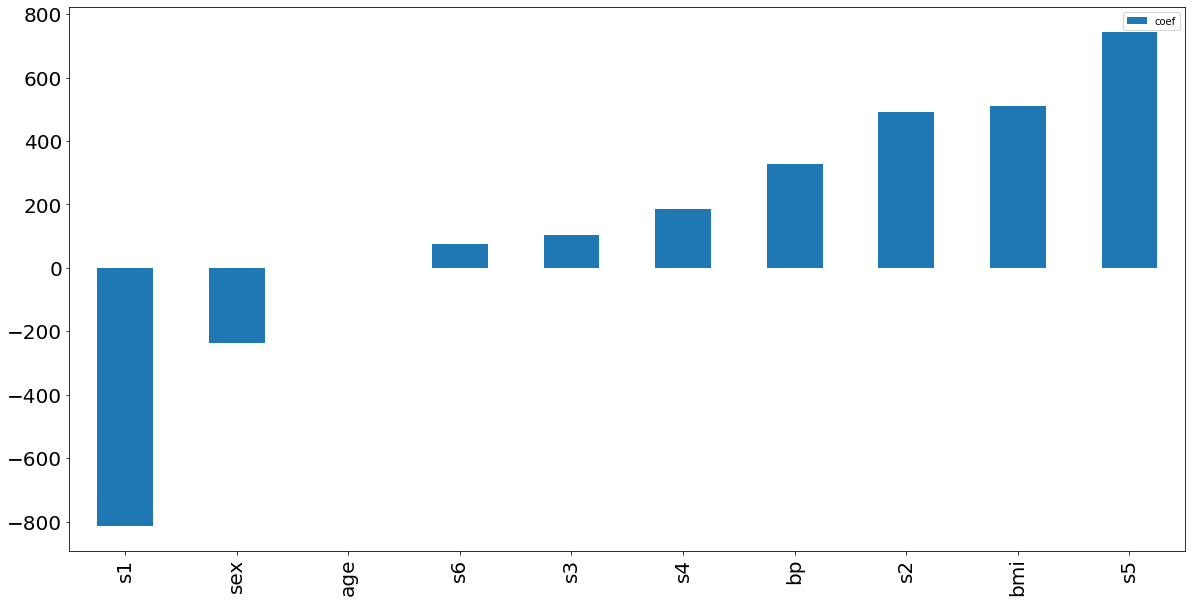

In [16]:
df_coef.sort_values(by='coef').plot(kind='bar',figsize=(20,10),fontsize=20)

## lasso이용_모델을 생성하고 fit-predict시행->mse구하기

In [32]:
regrLasso = linear_model.Lasso(alpha=1.0)  #얼마나 정규화를 할지? 변수를 더 많이 버리는 효과
regrLasso.fit(diabetes_X_train,diabetes_y_train)
predLasso = regrLasso.predict(diabetes_X_test)

print('Mean squared error: %.2f'
	% mean_squared_error(diabetes_y_test, predLasso))
print()

Mean squared error: 3037.26



<AxesSubplot:>

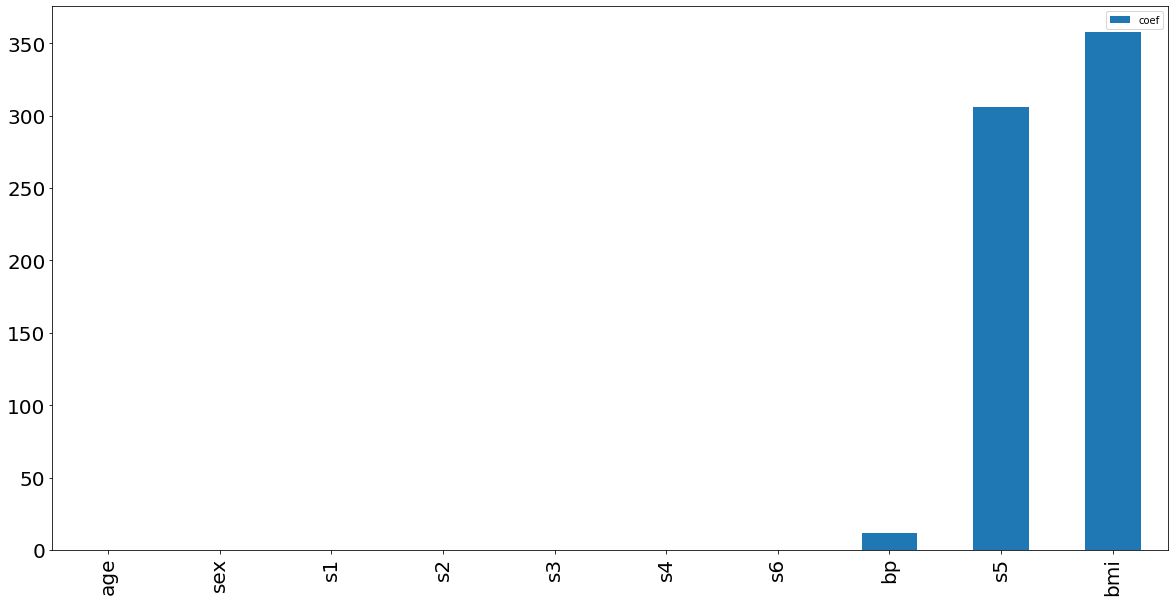

In [18]:
df_coefLasso = pd.DataFrame(regrLasso.coef_,index=diabetes.feature_names,columns=['coef']) #데이터화를 시행
df_coefLasso.sort_values(by='coef').plot(kind='bar',figsize=(20,10),fontsize=20) #각각을 시행

## Ridege model

Mean squared error: 3137.46



<AxesSubplot:>

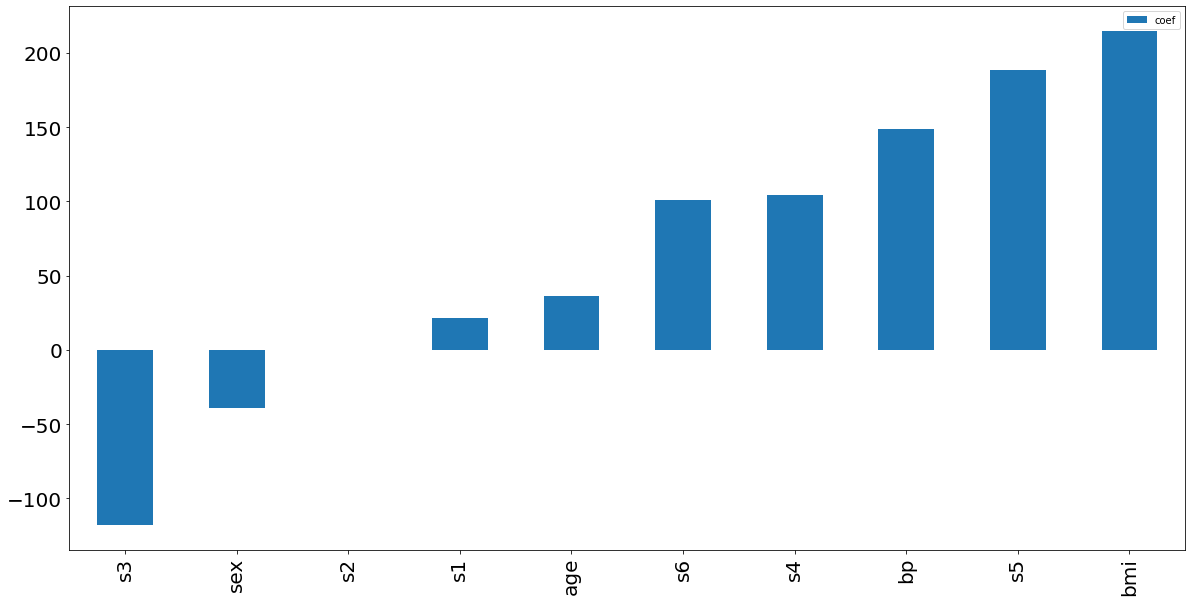

In [19]:
regrRidge = linear_model.Ridge(alpha=2.0)
regrRidge.fit(diabetes_X_train,diabetes_y_train)
predRidge = regrRidge.predict(diabetes_X_test)

print('Mean squared error: %.2f'
	% mean_squared_error(diabetes_y_test, predRidge))
print()

df_coefRidge = pd.DataFrame(regrRidge.coef_,index=diabetes.feature_names,columns=['coef'])  #데이터프레임화를 한 후 
df_coefRidge.sort_values(by='coef').plot(kind='bar',figsize=(20,10),fontsize=20) #각각을 그래프화를 시행함

## 나머지 알파값 조정은 책을 참고
##  hw파일도 참고해서 시행해도 괜찮을듯

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))
print("samples and vairable():\n", cancer.data.shape)

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
samples and vairable():
 (569, 30)


In [22]:
from sklearn.model_selection import train_test_split
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=20/569)
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_test.shape))

X_test: (20, 30)
y_train: (20,)


In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print("lasso_train_score:{}".format(lasso.score(X_train, y_train)))
print("lasso_test_score:{}".format(lasso.score(X_test, y_test)))

lasso_train_score:0.5627152474676816
lasso_test_score:0.5673745098794074


In [26]:
mse = np.mean((y_test_pred-y_test)**2)
mse

0.08111727939761111

    Columns  Coefficient Estimate
0         0             -0.000000
1         1             -0.000000
2         2             -0.000000
3         3             -0.000000
4         4             -0.000000
5         5             -0.000000
6         6             -0.000000
7         7             -0.000000
8         8             -0.000000
9         9             -0.000000
10       10             -0.000000
11       11             -0.000000
12       12             -0.000000
13       13              0.000000
14       14             -0.000000
15       15             -0.000000
16       16             -0.000000
17       17             -0.000000
18       18             -0.000000
19       19             -0.000000
20       20             -0.000000
21       21             -0.000000
22       22             -0.003008
23       23             -0.000445
24       24             -0.000000
25       25             -0.000000
26       26             -0.000000
27       27             -0.000000
28       28   

<function matplotlib.pyplot.show(close=None, block=None)>

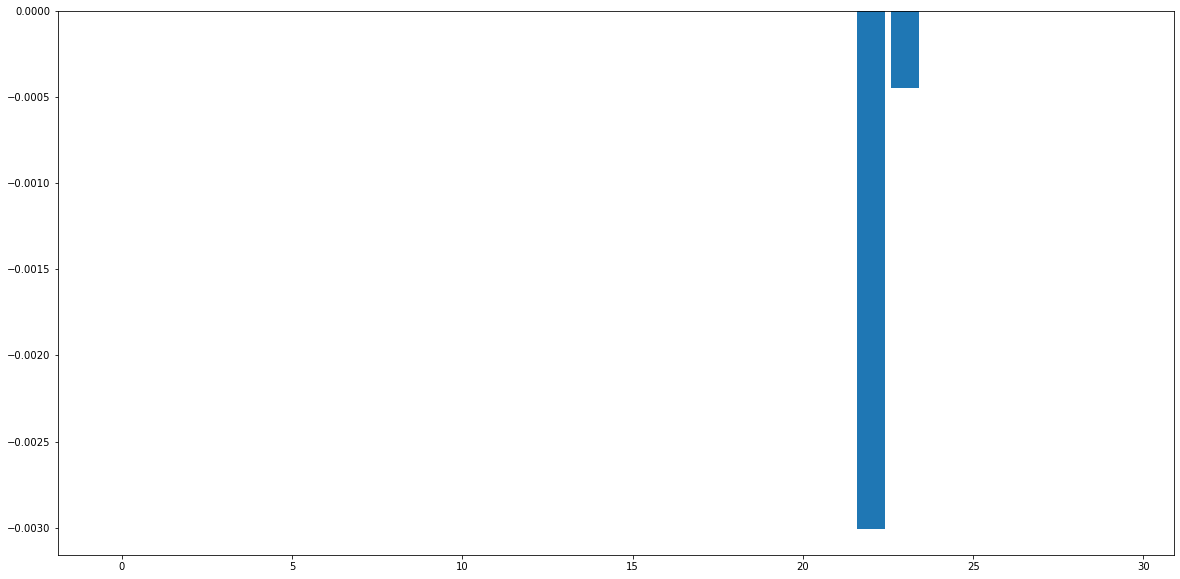

In [27]:
df = pd.DataFrame(X_train)
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = df.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coefficient)

fig, ax = plt.subplots(figsize = (20,10))
ax.bar(lasso_coefficient["Columns"], lasso_coefficient["Coefficient Estimate"])
plt.show